In [3]:
# Q1 + Q2 (Q1 will be in a gist)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the necessary libraries 

In [7]:
# Q2 Part 1
df = pd.read_csv(r"C:\Users\rache\knn_assignment\data\USA_cars_datasets.csv")

In [8]:
# Q2 Part 1
subset=df[['price','year','mileage']]
# subsetting the data 

In [10]:
# Q2 Part 1
subset['price'].isna().sum()
# checking if there are NA's to handle, there are not!

np.int64(0)

In [11]:
# Q2 Part 1
subset['year'].isna().sum()

np.int64(0)

In [12]:
# Q2 Part 1
subset['mileage'].isna().sum()

np.int64(0)

In [13]:
# Q2 Part 1
subset.head()

# There are no NA's to handle 

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [14]:
# Q2 Part 1
subset.describe()
# checking the dimensions

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [15]:
# Q2 Part 2
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X=subset.loc[:,['year','mileage']]
X = X.apply(maxmin)
subset.loc[:,'year']=X['year']
subset.loc[:,'mileage']=X['mileage']
X.head()
print(subset.head(5))

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


C:\Users\rache\AppData\Local\Temp\ipykernel_41332\46688280.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.74468085 0.80851064 0.95744681 ... 0.95744681 0.95744681 0.95744681]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  subset.loc[:,'year']=X['year']
C:\Users\rache\AppData\Local\Temp\ipykernel_41332\46688280.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.26928707 0.18719448 0.03889243 ... 0.03103731 0.03198335 0.03081824]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  subset.loc[:,'mileage']=X['mileage']


In [18]:
# Q2 Part 3
X = subset.drop("price", axis=1)   # all columns except target
y = subset["price"] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

In [21]:
# Q2 Part 4
from sklearn.neighbors import KNeighborsRegressor

k_bar = [3,10,25,50,100,300] # List of k's to try
SSE = [] # Where we store the SSE  
SSE_on_train = [] # save the training error

for k in k_bar:
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find where SSE equals the minimum
k_star = min_index[0]+1 # Find the optimal value of k
print(k_star)

[4]


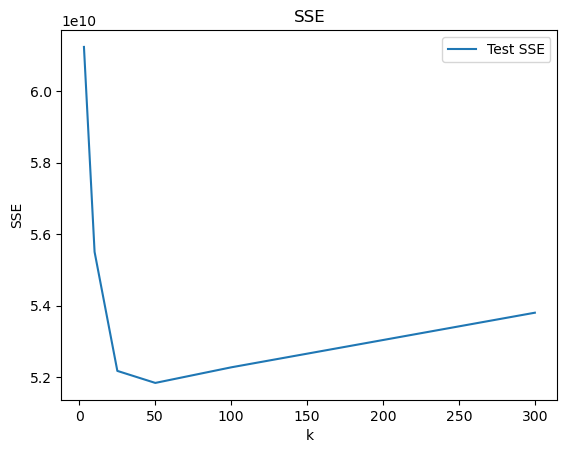

In [23]:
# Q2 Part 4
plt.plot(k_bar,SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# Plotting the graph; as K gets bigger, there is an initial drop then it slowly increases

In [31]:
# Q2 Part 4
n=len(y_test)
print(np.round((SSE),3))
ssefinal=[6.12332382e+10/n, 5.55004760e+10/n, 5.21716772e+10/n, 5.18354497e+10/n, 5.22715756e+10/n, 5.37993125e+10/n]  

[6.12332382e+10 5.55004760e+10 5.21716772e+10 5.18354497e+10
 5.22715756e+10 5.37993125e+10]


In [32]:
# Q2 Part 5
print(ssefinal)
# ask k increases, sse begins to increase in a linear fashion, but it first decreases. this is not ideal. the optimal k is 4

[122466476.4, 111000952.0, 104343354.4, 103670899.4, 104543151.2, 107598625.0]


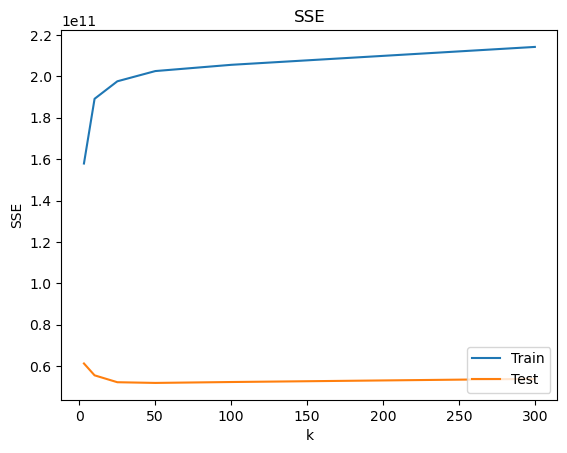

In [33]:
# Q2 Part 6
plt.plot(k_bar,SSE_on_train,label='Train') # Plot SSE by k
plt.plot(k_bar,SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

# the test set is better than training set as the training set is increasing SSE as K increases, but the test set SSE is staying neutral while K is increasing; seems to be overfitting